In [60]:
#1. 데이터 가져오기기
import pandas as pd
train = pd.read_csv('train.csv')

In [61]:
#2. datetime 칼럼을 datetime 자료형으로 변환하고 연,월,일,시,분,초까지 6가지 칼럼 생성하기
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

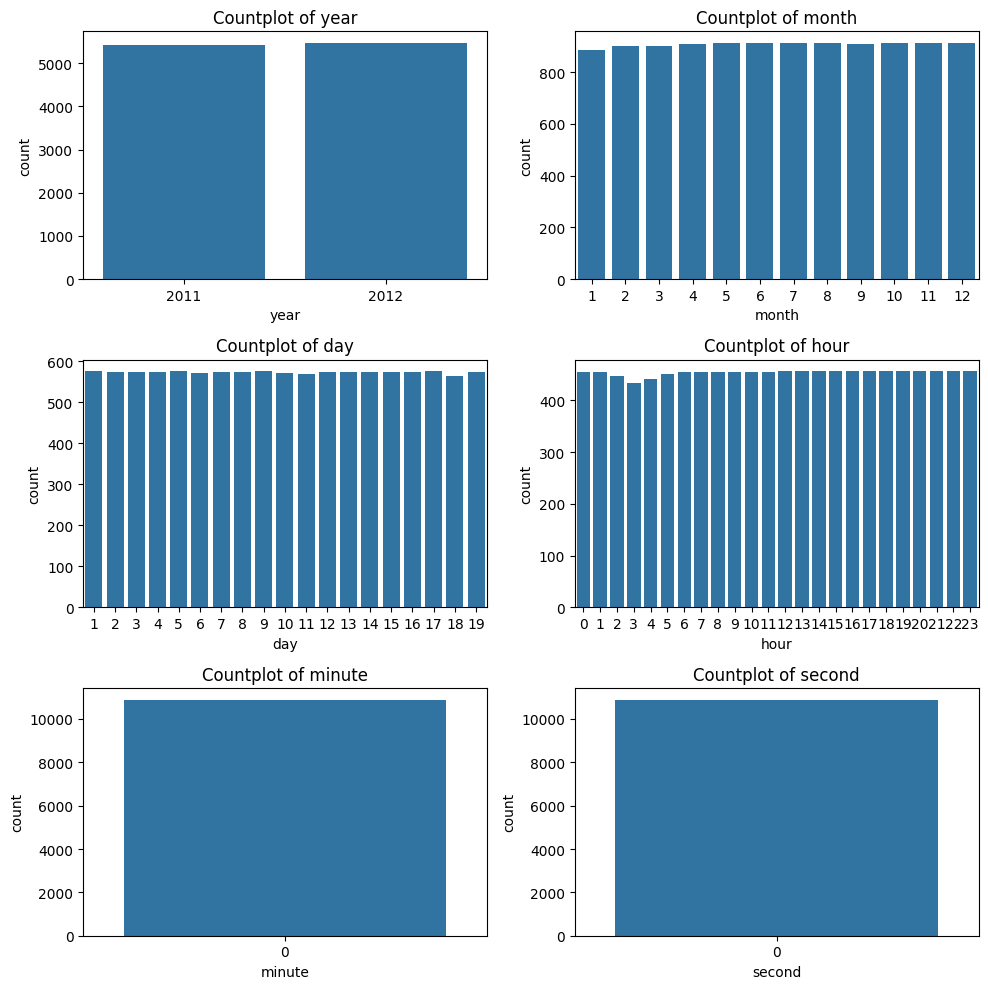

In [62]:
#3. year, month, day, hour, minute, second 데이터 개수 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

new_col = ['year','month','day','hour','minute','second']

fig, axes = plt.subplots(3, 2, figsize=(10,10))
for i, col in enumerate(new_col):
    ax = axes[i//2, i%2]
    sns.countplot(data=train, x=col, ax=ax)  # 각 서브플롯에 countplot
    ax.set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

In [63]:
#4. X,y 칼럼 선택 및 train/test 데이터 분리
import numpy as np

print(train.info())
print("registered & casual")
print(train['registered'].values + train['casual'].values)
print("count")
print(train['count'].values)

if np.array_equal(train['registered'].values + train['casual'].values, train['count'].values):
    print('They are the same')
else:
    print('They are different')
#minute, second의 경우 단일값만 가지므로 삭제필요, datetime도 삭제제
#casual, registered의 경우 둘을 합치면면 count이므로 삭제가능
#우선 이렇게 5개의 피처를 삭제하고 학습결과 확인
#분포가 안맞으므로 정규화 필요

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train_baseline = train.drop(['datetime','registered', 'casual', 'minute', 'second','count'], axis=1)
train_baseline_columns = train_baseline.columns

scaler = MinMaxScaler()
train_baseline_scaled = scaler.fit_transform(train_baseline)

X = pd.DataFrame(data=train_baseline_scaled, columns=train_baseline_columns)
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

In [64]:
# 5 LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
# 6 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산 - consequence.txt로 저장장
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")

MSE : 20299.496174744578
RMSE : 142.4763003967487


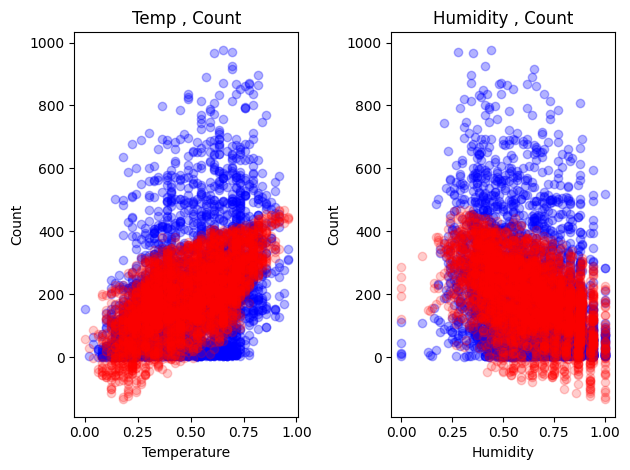

In [ ]:
# 7 x축은 temp 또는 humidity로, y축은 count로 예측결과 시각화하기
import matplotlib.pyplot as plt
plt.figure()
# temp와 count 시각화
plt.subplot(1, 2, 1)  
plt.scatter(X_test['temp'], y_test, color='blue', alpha=0.3)
plt.scatter(X_test['temp'], y_pred, color='red', alpha=0.2)  # 예측한 값
plt.title("Temp , Count")
plt.xlabel("Temperature")
plt.ylabel("Count")

# humidity와 count 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], y_test, color='blue', alpha=0.3)
plt.scatter(X_test['humidity'], y_pred, color='red', alpha=0.2)  # 예측한 값
plt.title("Humidity , Count")
plt.xlabel("Humidity")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig('Predict Consequence.png')
plt.show()
